## Q1

Gradient Descent Coefficients: [63.33059915  4.91106103]
Mean Squared Error: 6.101626727836602
Root Mean Squared Error: 2.4701471065174645
Sklearn Coefficients: Intercept = -13.249581239530976, Slope = 1.2060301507537687


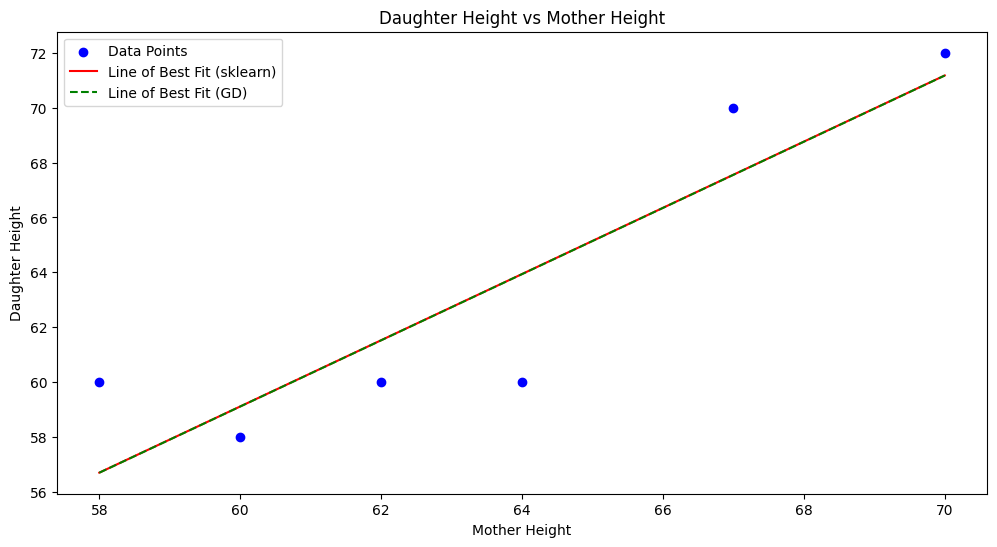

Predicted Daughter's Height for a mother height of 63 (using GD): 62.727610111866774


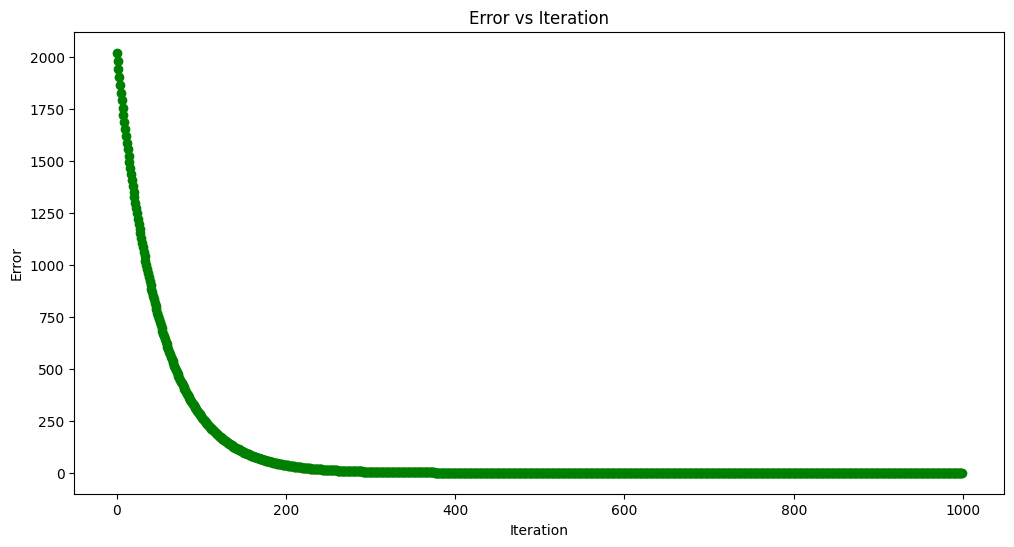

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('heights.csv')

X = data[['Mother Height']].values
y = data['Daughter Height'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_with_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = np.zeros(epochs)
    
    for i in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = (1/(2*m)) * np.sum(errors ** 2)
    
    return theta, cost_history

theta, cost_history = gradient_descent(X_scaled_with_intercept, y, learning_rate=0.01, epochs=1000)

predictions = X_scaled_with_intercept.dot(theta)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f"Gradient Descent Coefficients: {theta}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

model = LinearRegression()
model.fit(X, y)
sklearn_intercept = model.intercept_
sklearn_slope = model.coef_[0]
print(f"Sklearn Coefficients: Intercept = {sklearn_intercept}, Slope = {sklearn_slope}")

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data Points')

x_range = np.linspace(min(X), max(X), 100)
y_range_sklearn = sklearn_intercept + sklearn_slope * x_range
plt.plot(x_range, y_range_sklearn, color='red', label='Line of Best Fit (sklearn)')

x_range_scaled = scaler.transform(x_range.reshape(-1, 1))
x_range_scaled_with_intercept = np.c_[np.ones(x_range_scaled.shape[0]), x_range_scaled]
y_range_gd = x_range_scaled_with_intercept.dot(theta)
plt.plot(x_range, y_range_gd, color='green', linestyle='--', label='Line of Best Fit (GD)')

plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Daughter Height vs Mother Height')
plt.legend()
plt.show()

new_mother_height = 63
new_mother_height_scaled = scaler.transform([[new_mother_height]])
new_mother_height_scaled_with_intercept = np.c_[np.ones(new_mother_height_scaled.shape[0]), new_mother_height_scaled]
predicted_height_gd = new_mother_height_scaled_with_intercept.dot(theta)
print(f"Predicted Daughter's Height for a mother height of {new_mother_height} (using GD): {predicted_height_gd[0]}")

plt.figure(figsize=(12, 6))
plt.plot(range(1000), cost_history, color='green', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.show()


## Q2

Epoch 1, Iteration 1: theta = [ 0.778295   -0.77386712], error = 1.1715291709321332
Epoch 1, Iteration 2: theta = [ 0.77665154 -0.7679175 ], error = 1.1677100895025654
Epoch 1, Iteration 3: theta = [ 0.77500851 -0.76197807], error = 1.163903258789016
Epoch 1, Iteration 4: theta = [ 0.77336595 -0.75604884], error = 1.1601086846266433
Epoch 1, Iteration 5: theta = [ 0.77172388 -0.75012983], error = 1.1563263725523556
Epoch 1, Iteration 6: theta = [ 0.77008231 -0.74422104], error = 1.1525563278033626
Epoch 1, Iteration 7: theta = [ 0.76844129 -0.73832251], error = 1.14879855531575
Epoch 1, Iteration 8: theta = [ 0.76680082 -0.73243424], error = 1.1450530597230735
End of Epoch 1: Average Log Loss = 1.1582481899056125
Epoch 2, Iteration 1: theta = [ 0.76516094 -0.72655625], error = 1.141319845354968
Epoch 2, Iteration 2: theta = [ 0.76352167 -0.72068854], error = 1.137598916235782
Epoch 2, Iteration 3: theta = [ 0.76188304 -0.71483115], error = 1.1338902760832266
Epoch 2, Iteration 4: theta

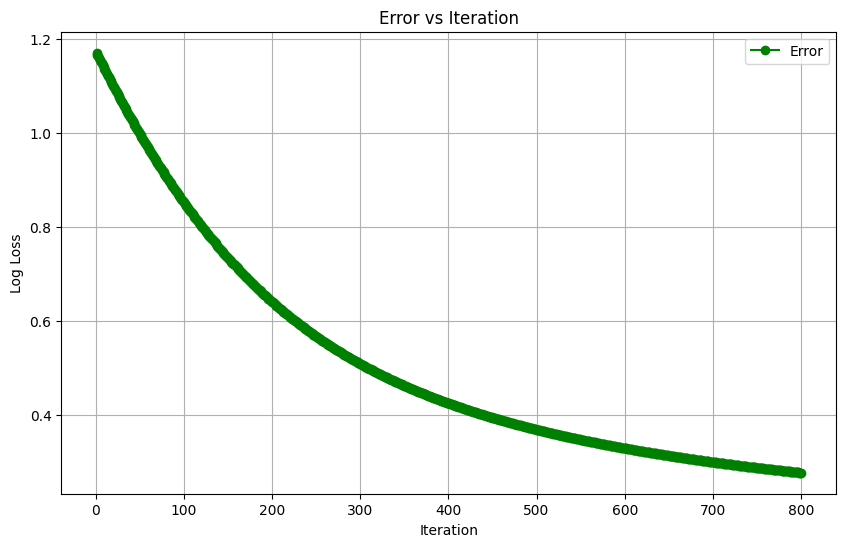

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Studyhrs.csv')
X = data[['Hours of Study (X)']].values
y = data[['Pass (Y)']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, learning_rate=0.01, epochs=3, iterations_per_epoch=8):
    m = len(y)
    theta = np.random.randn(2, 1)
    errors = []
    
    total_iterations = epochs * iterations_per_epoch
    for epoch in range(epochs):
        for iteration in range(iterations_per_epoch):
            predictions = sigmoid(X.dot(theta))
            gradients = 1/m * X.T.dot(predictions - y)
            theta -= learning_rate * gradients
            
            error = log_loss(y, predictions)
            errors.append(error)
            print(f'Epoch {epoch + 1}, Iteration {iteration + 1}: theta = {theta.ravel()}, error = {error}')
        
        avg_epoch_error = np.mean(errors[-iterations_per_epoch:])
        print(f'End of Epoch {epoch + 1}: Average Log Loss = {avg_epoch_error}')
    
    return theta, errors

theta, errors = gradient_descent(X_b, y, learning_rate=0.01, epochs=100, iterations_per_epoch=8)

model = LogisticRegression(fit_intercept=False, solver='lbfgs').fit(X_scaled, y.ravel())
sklearn_theta = model.coef_.reshape(-1, 1)

def predict_probabilities(X, theta):
    return sigmoid(X.dot(theta))

def predict_class(probabilities):
    return (probabilities >= 0.5).astype(int)

probabilities = predict_probabilities(X_b, theta)
predictions = predict_class(probabilities)
accuracy = accuracy_score(y, predictions)
print(f'Accuracy: {accuracy:.2f}')

study_hours = np.array([[3.5], [7.5]])
study_hours_scaled = scaler.transform(study_hours)
study_hours_b = np.c_[np.ones((study_hours_scaled.shape[0], 1)), study_hours_scaled]
probabilities_new = predict_probabilities(study_hours_b, theta)

print(f'Probability of passing for 3.5 hours of study: {probabilities_new[0, 0]:.2f}')
print(f'Probability of passing for 7.5 hours of study: {probabilities_new[1, 0]:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, color='green', marker='o', label='Error')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Error vs Iteration')
plt.legend()
plt.grid(True)
plt.show()


## Q3

Epoch 0: theta = [ 0.60510493  0.46017928 -0.16462773], error = 0.8312731056905287
Epoch 100: theta = [ 0.32939842  0.32980248 -0.46957634], error = 0.6443868418177036
Epoch 200: theta = [ 0.11109251  0.24293695 -0.70373202], error = 0.533790713741575
Epoch 300: theta = [-0.06318301  0.18938806 -0.88765059], error = 0.466460261273256
Epoch 400: theta = [-0.20593152  0.15762803 -1.03808157], error = 0.42232783139297786
Epoch 500: theta = [-0.32600691  0.13953456 -1.16590599], error = 0.3911896252043683
Epoch 600: theta = [-0.42930906  0.13007876 -1.27787075], error = 0.3678663405193241
Epoch 700: theta = [-0.51986947  0.12618249 -1.37819098], error = 0.34957263547530193
Epoch 800: theta = [-0.60046684  0.1259199  -1.46963445], error = 0.33470808089261733
Epoch 900: theta = [-0.67313668  0.1280724  -1.55404394], error = 0.3222942589256154
Accuracy: 0.83
Scikit-Learn Predictions: [1 0 1 1 0 0]
Scikit-Learn Probabilities: [0.69055935 0.21340571 0.75100785 0.62287002 0.47496409 0.26820803]


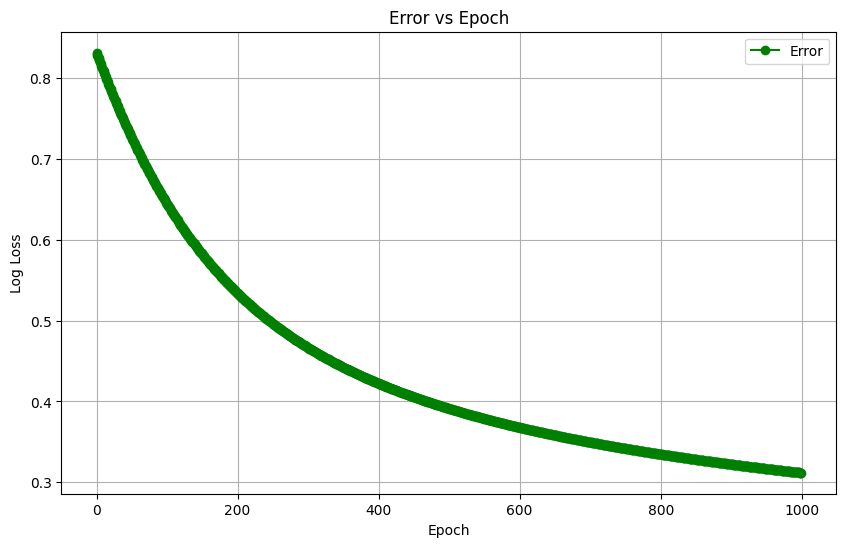

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler

data = {
    'X1': [4, 2, 1, 3, 1, 6],
    'X2': [1, 8, 0, 2, 4, 7],
    'Y': [1, 0, 1, 0, 0, 0]
}

df = pd.DataFrame(data)

X = df[['X1', 'X2']].values
y = df['Y'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    y = y.reshape(-1, 1)
    errors = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        for i in indices:
            xi = X[i:i+1]
            yi = y[i:i+1]
            predictions = sigmoid(xi.dot(theta))
            gradient = xi.T.dot(predictions - (yi > 0)) / m
            theta -= learning_rate * gradient
        
        predictions_all = sigmoid(X.dot(theta))
        error = log_loss(y > 0, predictions_all)
        errors.append(error)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: theta = {theta.ravel()}, error = {error}')
    
    return theta, errors

theta, errors = stochastic_gradient_descent(X_b, y, learning_rate=0.01, epochs=1000)

model = LogisticRegression(fit_intercept=False, solver='lbfgs').fit(X_scaled, (y > 0).astype(int))
sklearn_theta = model.coef_.T

def predict_probabilities(X, theta):
    return sigmoid(X.dot(theta))

def predict_class(probabilities):
    return (probabilities >= 0.5).astype(int)

probabilities = predict_probabilities(X_b, theta)
predictions = predict_class(probabilities)
accuracy = accuracy_score((y > 0).astype(int), predictions)
print(f'Accuracy: {accuracy:.2f}')

sklearn_probabilities = model.predict_proba(X_scaled)[:, 1]
sklearn_predictions = model.predict(X_scaled)

print(f'Scikit-Learn Predictions: {sklearn_predictions}')
print(f'Scikit-Learn Probabilities: {sklearn_probabilities}')

plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, color='green', marker='o', label='Error')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Error vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


## Aditional Questions

## Q1 (for gold data)

Gradient Descent Coefficients: [10070.44453792 11305.21659872]
Mean Squared Error: 62644361.15100551
Root Mean Squared Error: 7914.819085172163
Sklearn Coefficients: Intercept = -1336226.7042665111, Slope = 675.3436586791352


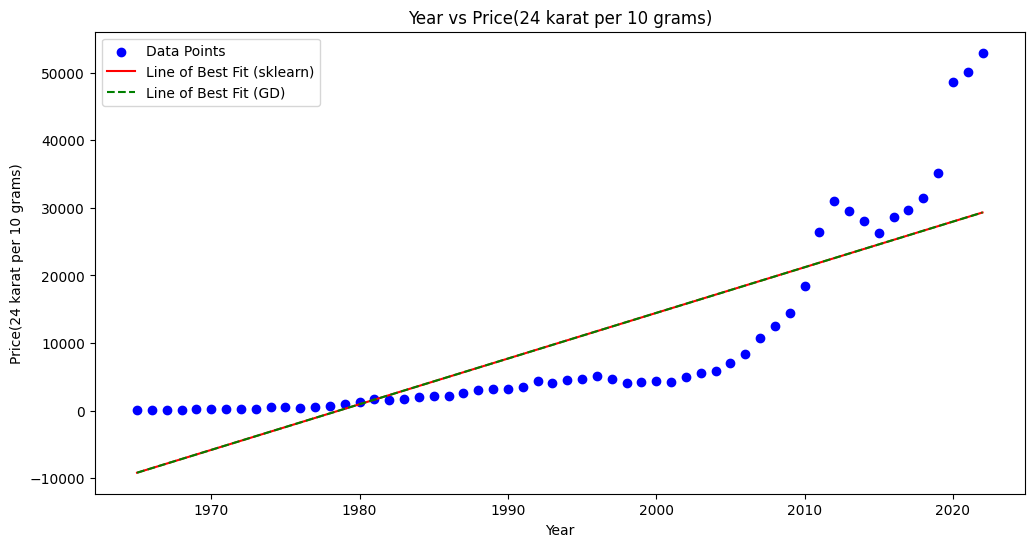

Predicted Gold's Price for 2025 (using GD): 31342.85139032768


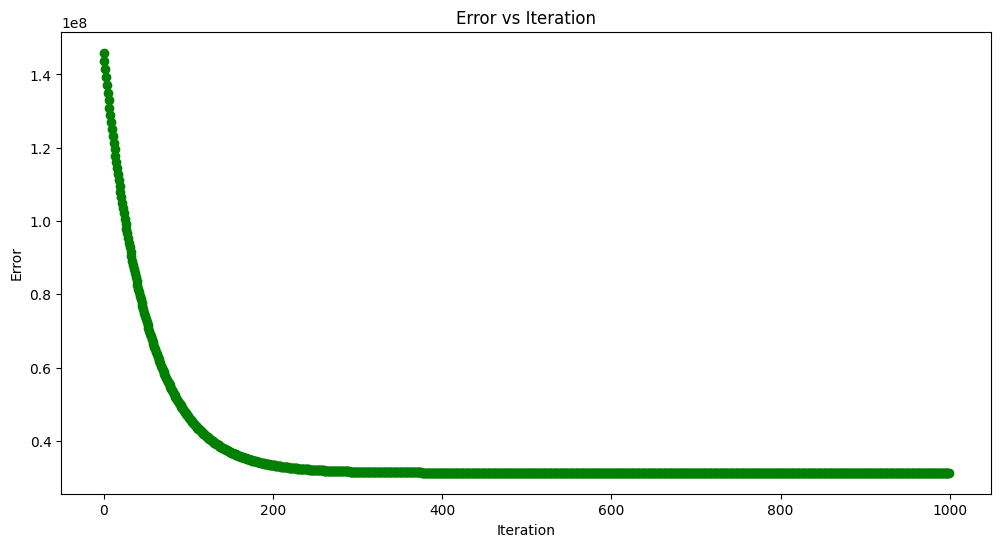

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('gold.csv')

X = data[['Year']].values
y = data['Price(24 karat per 10 grams)'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_with_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = np.zeros(epochs)
    
    for i in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = (1/(2*m)) * np.sum(errors ** 2)
    
    return theta, cost_history

theta, cost_history = gradient_descent(X_scaled_with_intercept, y, learning_rate=0.01, epochs=1000)

predictions = X_scaled_with_intercept.dot(theta)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f"Gradient Descent Coefficients: {theta}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

model = LinearRegression()
model.fit(X, y)
sklearn_intercept = model.intercept_
sklearn_slope = model.coef_[0]
print(f"Sklearn Coefficients: Intercept = {sklearn_intercept}, Slope = {sklearn_slope}")

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data Points')

x_range = np.linspace(min(X), max(X), 100)
y_range_sklearn = sklearn_intercept + sklearn_slope * x_range
plt.plot(x_range, y_range_sklearn, color='red', label='Line of Best Fit (sklearn)')

x_range_scaled = scaler.transform(x_range.reshape(-1, 1))
x_range_scaled_with_intercept = np.c_[np.ones(x_range_scaled.shape[0]), x_range_scaled]
y_range_gd = x_range_scaled_with_intercept.dot(theta)
plt.plot(x_range, y_range_gd, color='green', linestyle='--', label='Line of Best Fit (GD)')

plt.xlabel('Year')
plt.ylabel('Price(24 karat per 10 grams)')
plt.title('Year vs Price(24 karat per 10 grams)')
plt.legend()
plt.show()

new_gold_year = 2025
new_gold_year_scaled = scaler.transform([[new_gold_year]])
new_gold_year_scaled_with_intercept = np.c_[np.ones(new_gold_year_scaled.shape[0]), new_gold_year_scaled]
predicted_price_gd = new_gold_year_scaled_with_intercept.dot(theta)
print(f"Predicted Gold's Price for {new_gold_year} (using GD): {predicted_price_gd[0]}")

plt.figure(figsize=(12, 6))
plt.plot(range(1000), cost_history, color='green', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.show()


## Q2 (for silver data)

Gradient Descent Coefficients: [20422.80876    16832.14714065]
Mean Squared Error: 94699882.96074179
Root Mean Squared Error: 9731.386487070678
Sklearn Coefficients: Intercept = -2759150.8793722824, Slope = 1388.7457256300138


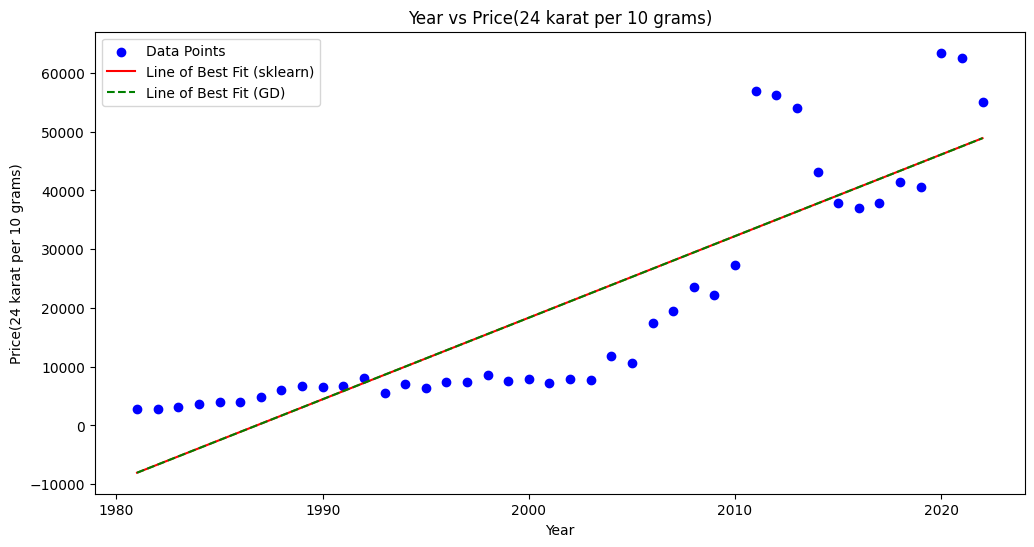

Predicted Silver's Price for 2025 (using GD): 53056.92439599639


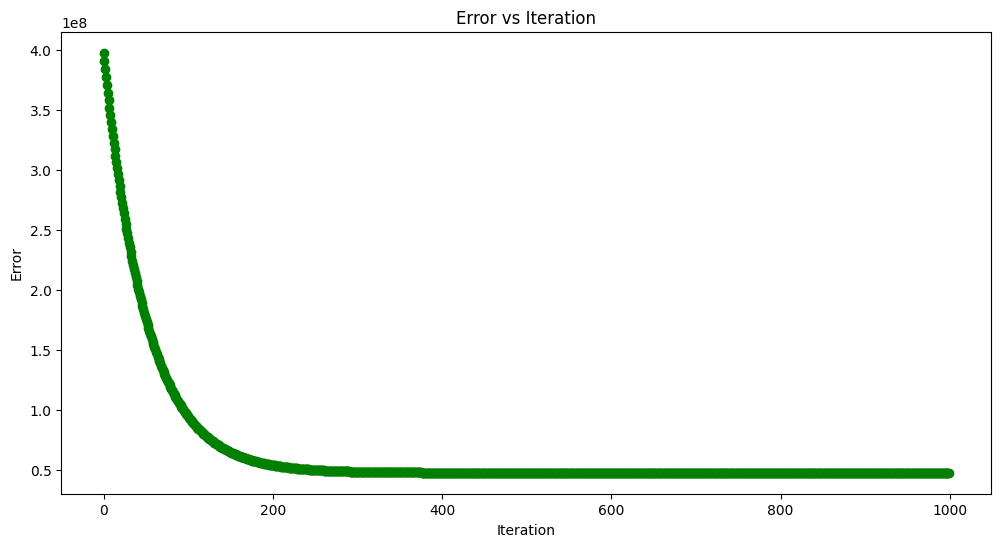

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('silver.csv')

X = data[['Year']].values
y = data['Silver rates in Rs./Kg.'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_with_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = np.zeros(epochs)
    
    for i in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = (1/(2*m)) * np.sum(errors ** 2)
    
    return theta, cost_history

theta, cost_history = gradient_descent(X_scaled_with_intercept, y, learning_rate=0.01, epochs=1000)

predictions = X_scaled_with_intercept.dot(theta)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f"Gradient Descent Coefficients: {theta}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

model = LinearRegression()
model.fit(X, y)
sklearn_intercept = model.intercept_
sklearn_slope = model.coef_[0]
print(f"Sklearn Coefficients: Intercept = {sklearn_intercept}, Slope = {sklearn_slope}")

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data Points')

x_range = np.linspace(min(X), max(X), 100)
y_range_sklearn = sklearn_intercept + sklearn_slope * x_range
plt.plot(x_range, y_range_sklearn, color='red', label='Line of Best Fit (sklearn)')

x_range_scaled = scaler.transform(x_range.reshape(-1, 1))
x_range_scaled_with_intercept = np.c_[np.ones(x_range_scaled.shape[0]), x_range_scaled]
y_range_gd = x_range_scaled_with_intercept.dot(theta)
plt.plot(x_range, y_range_gd, color='green', linestyle='--', label='Line of Best Fit (GD)')

plt.xlabel('Year')
plt.ylabel('Price(24 karat per 10 grams)')
plt.title('Year vs Price(24 karat per 10 grams)')
plt.legend()
plt.show()

new_silver_year = 2025
new_silver_year_scaled = scaler.transform([[new_silver_year]])
new_silver_year_scaled_with_intercept = np.c_[np.ones(new_silver_year_scaled.shape[0]), new_silver_year_scaled]
predicted_price_gd = new_silver_year_scaled_with_intercept.dot(theta)
print(f"Predicted Silver's Price for {new_silver_year} (using GD): {predicted_price_gd[0]}")

plt.figure(figsize=(12, 6))
plt.plot(range(1000), cost_history, color='green', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.show()
